# Exploration des ventes par jour

In [1]:
import pandas as pd

ventes = pd.read_csv("../data/cleaned/ventes_cleaned.csv" , index_col='DateTime', parse_dates=True)

In [2]:
ventes.head()

,ItemCode,ItemName,CategoryCode,CategoryName,QuantityKg,UnitPrice,SaleType,Discount,WholesalePrice,LossRate,QuantityCluster
DateTime,,,,,,,,,,,
2020-07-01 16:27:36.983,0,Amaranth,0,Flower/Leaf Vegetables,0.920,6.0,1,0,3.88,18.52,0
2020-07-03 09:19:18.438,0,Amaranth,0,Flower/Leaf Vegetables,0.886,6.0,1,0,3.88,18.52,0
2020-07-09 09:54:40.682,0,Amaranth,0,Flower/Leaf Vegetables,0.944,5.0,1,0,3.88,18.52,0
2020-07-12 10:38:15.217,0,Amaranth,0,Flower/Leaf Vegetables,1.044,5.0,1,0,3.88,18.52,0
2020-07-23 11:25:53.623,0,Amaranth,0,Flower/Leaf Vegetables,0.950,7.6,1,0,3.88,18.52,0


liste des 5 prémiers lignes de DataFrame pour ventes journalier 

In [3]:
ventes.shape 

(16260, 11)

Le jeu de données contient 16260 enregistrements (lignes) et 11 variables (colonnes).

In [ ]:
ventes.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16260 entries, 2020-07-01 16:27:36.983000 to 2020-12-09 17:05:29.621000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ItemCode         16260 non-null  int64  
 1   ItemName         16260 non-null  object 
 2   CategoryCode     16260 non-null  int64  
 3   CategoryName     16260 non-null  object 
 4   QuantityKg       16260 non-null  float64
 5   UnitPrice        16260 non-null  float64
 6   SaleType         16260 non-null  int64  
 7   Discount         16260 non-null  int64  
 8   WholesalePrice   16260 non-null  float64
 9   LossRate         16260 non-null  float64
 10  QuantityCluster  16260 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


Les données se composent de trois types de variables : int64, float64 et object. 

In [10]:
ventes.isnull().sum()

ItemCode           0
ItemName           0
CategoryCode       0
CategoryName       0
QuantityKg         0
UnitPrice          0
SaleType           0
Discount           0
WholesalePrice     0
LossRate           0
QuantityCluster    0
dtype: int64

Toutes les variables ne présentent aucune valeur nulle.

In [11]:
ventes.nunique()

ItemCode             45
ItemName             44
CategoryCode          6
CategoryName          6
QuantityKg         1443
UnitPrice            55
SaleType              1
Discount              1
WholesalePrice       44
LossRate             44
QuantityCluster       3
dtype: int64

In [12]:
ventes = ventes.drop(['SaleType', 'Discount'], axis=1)

On supprime cette colonne, car elle ne contient aucune information utile pour la suite de l’analyse.

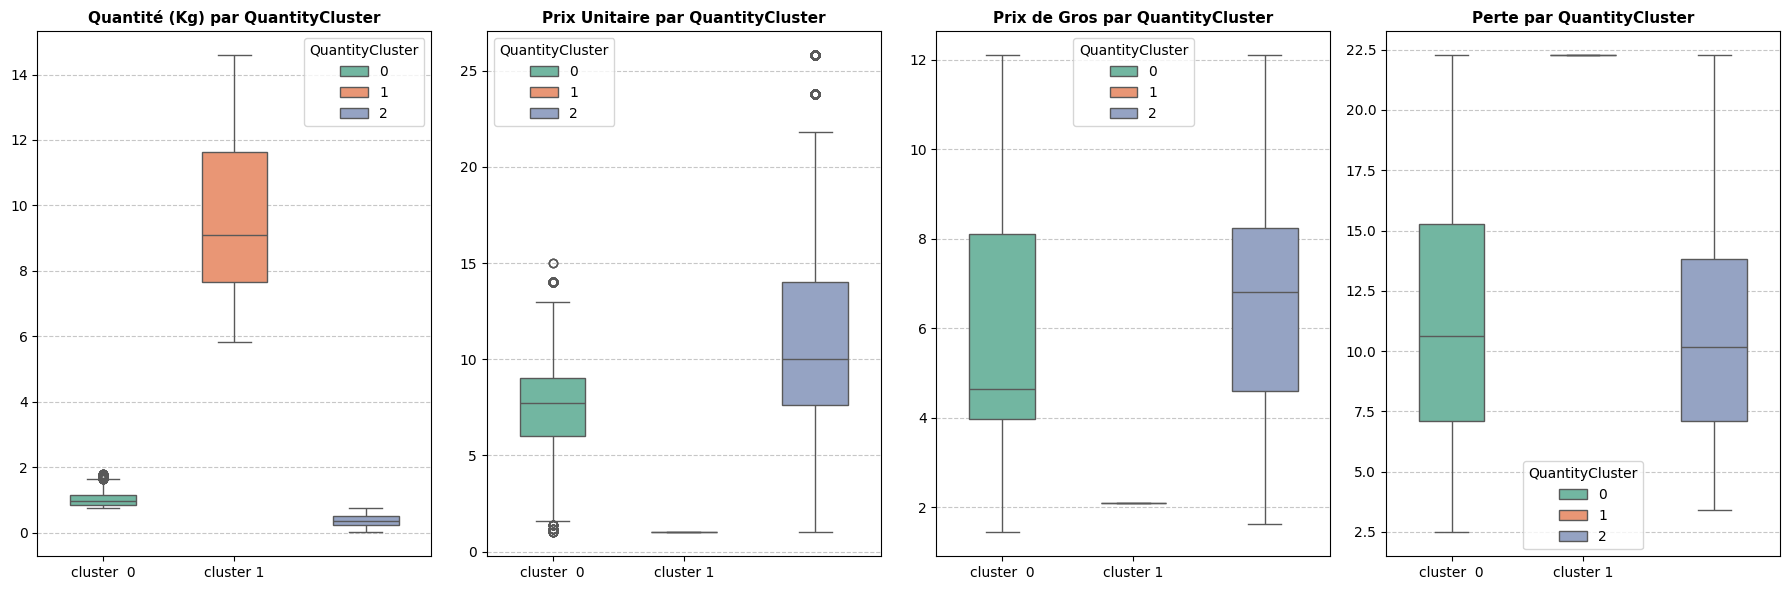

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables à afficher
variables = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'LossRate']
titles = {
    'QuantityKg': "Quantité (Kg)",
    'UnitPrice': "Prix Unitaire",
    'WholesalePrice': "Prix de Gros",
    'LossRate': "Perte"
}

# Mapping des labels de QuantityCluster
seg_labels = {0: "cluster  0", 1: "cluster 1" , 2 :'cluster 2' }

# Création des sous-graphes
fig, axes = plt.subplots(1, 4, figsize=(18,6))

for ax, var in zip(axes, variables):
    sns.boxplot(
        data=ventes, y=var, x="QuantityCluster", hue="QuantityCluster", ax=ax,
        palette='Set2', width=0.5
    )
    ax.set_title(f"{titles[var]} par QuantityCluster", fontsize=11, fontweight="bold")
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    ax.grid(axis="y", linestyle="--", alpha=0.7)


    ax.set_xticks([0, 1])
    ax.set_xticklabels([seg_labels[0], seg_labels[1], seg_labels[2]])

plt.tight_layout()
plt.show()


Cluster 1 : ventes en grande quantité, avec un prix faible et un taux de perte faible, ce qui rend ces ventes rentables.

Clusters 0 et 2 : ventes en petite quantité, avec un prix élevé et un taux de perte plus important. Ces produits sont donc moins rentables, et il est nécessaire de les analyser plus en détail afin d’identifier les causes de cette moindre rentabilité.

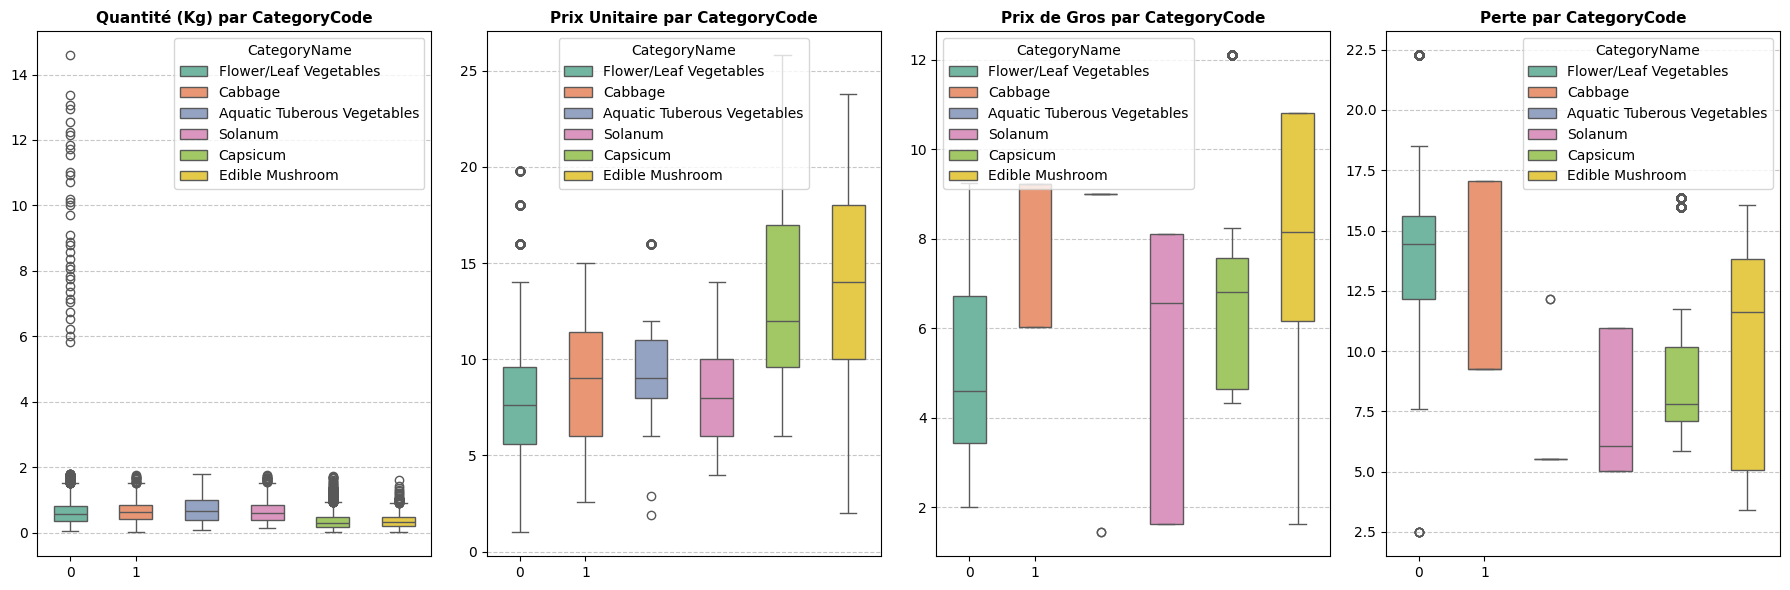

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables à afficher
variables = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'LossRate']
titles = {
    'QuantityKg': "Quantité (Kg)",
    'UnitPrice': "Prix Unitaire",
    'WholesalePrice': "Prix de Gros",
    'LossRate': "Perte"
}


# Création des sous-graphes
fig, axes = plt.subplots(1, 4, figsize=(18,6))

for ax, var in zip(axes, variables):
    sns.boxplot(
        data=ventes, y=var, x="CategoryCode", hue="CategoryName", ax=ax,
        palette='Set2', width=0.5
    )
    ax.set_title(f"{titles[var]} par CategoryCode", fontsize=11, fontweight="bold")
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    ax.grid(axis="y", linestyle="--", alpha=0.7)


    # Remplacer 0/1 par Vente 1 / Vente 2
    ax.set_xticks([0, 1])

plt.tight_layout()
plt.show()


D’après ce graphique, la catégorie « Flower/Leaf Vegetables » regroupe les produits vendus en grande quantité, ce qui en fait la catégorie la plus rentable.

En revanche, les autres catégories concernent des produits vendus en plus petites quantités, généralement à des prix élevés, et présentant un taux de perte plus important.

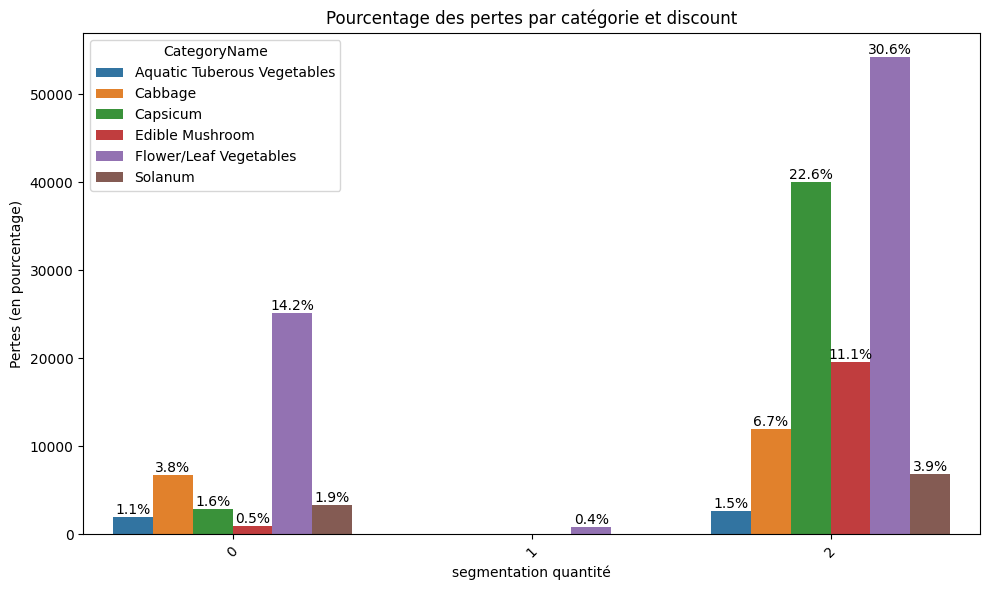

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer le total des pertes pour chaque groupe
grouped = ventes.groupby(['QuantityCluster', 'CategoryName'])['LossRate'].sum().reset_index()
total = grouped['LossRate'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=grouped, x="QuantityCluster", y="LossRate", hue='CategoryName')

# Afficher les labels en pourcentage
for container in ax.containers:
    ax.bar_label(container, labels=[f"{(v/total*100):.1f}%" for v in container.datavalues], fontsize=10)

plt.title('Pourcentage des pertes par catégorie et discount')
plt.xlabel('segmentation quantité')
plt.ylabel('Pertes (en pourcentage)')
plt.xticks(rotation=45)
plt.tight_layout()  

plt.show()

On observe que le cluster 1 présente un taux de perte presque nul, ce qui indique des ventes très rentables.

Le cluster 0 est relativement stable, avec un taux de perte maximal de 14,2 %, ce qui reste faible.

En revanche, le cluster 2 affiche un taux de perte plus élevé, atteignant 30,6 % pour certaines catégories, ce qui est supérieur aux autres clusters.

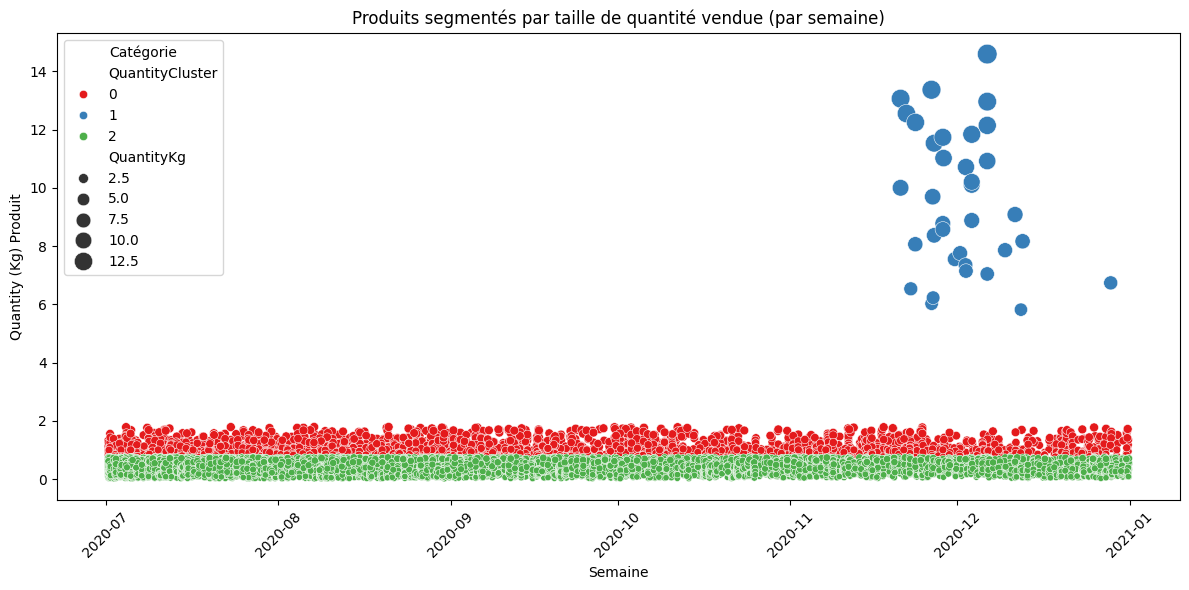

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graphique
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=ventes,
    x=ventes.index,
    y='QuantityKg',
    size='QuantityKg',
    hue='QuantityCluster',
    palette='Set1',
    sizes=(20,200)
)
plt.xticks(rotation=45)
plt.title("Produits segmentés par taille de quantité vendue (par semaine)")
plt.xlabel("Semaine")
plt.ylabel("Quantity (Kg) Produit")
plt.legend(title='Catégorie')
plt.tight_layout()
plt.show()


On remarque que : la majorité des ventes reste stable pour les clusters 0 et 2, mais un cluster supplémentaire avec de fortes quantités se forme vers la fin du mois.

In [15]:
ventes.head()

,ItemCode,ItemName,CategoryCode,CategoryName,QuantityKg,UnitPrice,WholesalePrice,LossRate,QuantityCluster
DateTime,,,,,,,,,
2020-07-01 16:27:36.983,0,Amaranth,0,Flower/Leaf Vegetables,0.920,6.0,3.88,18.52,0
2020-07-03 09:19:18.438,0,Amaranth,0,Flower/Leaf Vegetables,0.886,6.0,3.88,18.52,0
2020-07-09 09:54:40.682,0,Amaranth,0,Flower/Leaf Vegetables,0.944,5.0,3.88,18.52,0
2020-07-12 10:38:15.217,0,Amaranth,0,Flower/Leaf Vegetables,1.044,5.0,3.88,18.52,0
2020-07-23 11:25:53.623,0,Amaranth,0,Flower/Leaf Vegetables,0.950,7.6,3.88,18.52,0


In [16]:
ventes.to_csv('../data/processed/ventes_not_seasonal.csv', index=True)  

# Exploration des tendances saisonnières

In [ ]:
ventes_seasonal = pd.read_csv('../data/processed/ventes_not_seasonal.csv' ,  
                                index_col='DateTime',      
                                parse_dates=['DateTime']    
    )  

In [43]:
ventes_seasonal.head()

,ItemCode,ItemName,CategoryCode,CategoryName,QuantityKg,UnitPrice,SaleType,Discount,WholesalePrice,LossRate,QuantityCluster
DateTime,,,,,,,,,,,
2020-07-01 16:27:36.983,0,Amaranth,0,Flower/Leaf Vegetables,0.920,6.0,1,0,3.88,18.52,0
2020-07-03 09:19:18.438,0,Amaranth,0,Flower/Leaf Vegetables,0.886,6.0,1,0,3.88,18.52,0
2020-07-09 09:54:40.682,0,Amaranth,0,Flower/Leaf Vegetables,0.944,5.0,1,0,3.88,18.52,0
2020-07-12 10:38:15.217,0,Amaranth,0,Flower/Leaf Vegetables,1.044,5.0,1,0,3.88,18.52,0
2020-07-23 11:25:53.623,0,Amaranth,0,Flower/Leaf Vegetables,0.950,7.6,1,0,3.88,18.52,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


def custom_agg(x):
    if x.name in ['LossRate']:  
        return x.mean()
    return x.sum()


ventes_seasonal['Annee'] = ventes_seasonal.index.year
ventes_seasonal['Mois'] = ventes_seasonal.index.month
ventes_seasonal['Jour'] = ventes_seasonal.index.day

ventes_daily = ventes_seasonal.groupby(['Annee', 'Mois', 'Jour']).agg(custom_agg).reset_index()

Après l’application de la méthode saisonnalisation, la série temporelle est décomposée en trois composantes principales:

La tendance (trend), qui met en évidence l’évolution générale des ventes au fil du temps.

La saisonnalité (seasonal), qui permet d’identifier les variations récurrentes selon les périodes.

La composante résiduelle (residual), qui correspond aux fluctuations imprévisibles non expliquées par

In [47]:
ventes_daily.head()

,Annee,Mois,Jour,ItemCode,ItemName,CategoryCode,CategoryName,QuantityKg,UnitPrice,SaleType,Discount,WholesalePrice,LossRate,QuantityCluster
0,2020,7,1,10418,AmaranthYunnan ShengcaiYunnan ShengcaiZhuyecai...,1137,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,229.168,5709.9,544,0,3424.11,10.803952,978
1,2020,7,2,6329,Yunnan ShengcaiYunnan ShengcaiYunnan ShengcaiY...,806,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,137.249,3720.0,321,0,2194.87,10.915888,574
2,2020,7,3,4923,AmaranthYunnan ShengcaiYunnan ShengcaiYunnan S...,523,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,108.995,2365.8,226,0,1443.48,11.304646,374
3,2020,7,4,5383,Yunnan ShengcaiShanghaiqingCaixinCaixinChinese...,536,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,102.801,2413.4,219,0,1425.49,10.556712,346
4,2020,7,5,5144,Yunnan ShengcaiZhuyecaiZhuyecaiShanghaiqingSha...,469,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,106.455,2263.5,208,0,1329.93,11.350288,324


In [ ]:

ventes_daily['SaleDate'] = pd.to_datetime(
    ventes_daily.rename(columns={'Annee': 'year', 'Mois': 'month', 'Jour': 'day'})[['year', 'month', 'day']]
)

ventes_daily = ventes_daily.drop(['Annee', 'Mois', 'Jour'], axis=1)


On reconstitue une vraie date à partir des colonnes Année, Mois et Jour.

In [49]:
ventes_daily.shape

(184, 12)

Le jeu de données ventes_daily contient 184 observations et 12 variables.

Les 184 lignes correspondent aux ventes enregistrées sur une période de 6 mois.

Les 12 colonnes représentent les différentes variables décrivant chaque vente. 

In [ ]:
ventes_daily.head() 

,ItemCode,ItemName,CategoryCode,CategoryName,QuantityKg,UnitPrice,SaleType,Discount,WholesalePrice,LossRate,QuantityCluster,SaleDate
0,10418,AmaranthYunnan ShengcaiYunnan ShengcaiZhuyecai...,1137,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,229.168,5709.9,544,0,3424.11,10.803952,978,2020-07-01
1,6329,Yunnan ShengcaiYunnan ShengcaiYunnan ShengcaiY...,806,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,137.249,3720.0,321,0,2194.87,10.915888,574,2020-07-02
2,4923,AmaranthYunnan ShengcaiYunnan ShengcaiYunnan S...,523,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,108.995,2365.8,226,0,1443.48,11.304646,374,2020-07-03
3,5383,Yunnan ShengcaiShanghaiqingCaixinCaixinChinese...,536,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,102.801,2413.4,219,0,1425.49,10.556712,346,2020-07-04
4,5144,Yunnan ShengcaiZhuyecaiZhuyecaiShanghaiqingSha...,469,Flower/Leaf VegetablesFlower/Leaf VegetablesFl...,106.455,2263.5,208,0,1329.93,11.350288,324,2020-07-05


In [ ]:
ventes_daily['SaleDate'] = pd.to_datetime(ventes_daily['SaleDate'])


ventes_daily = ventes_daily.set_index('SaleDate')

La colonne DateTime a été définie comme index afin de permettre des analyses de tendances temporelles, c’est-à-dire des analyses basées sur l’évolution des données dans le temps

In [ ]:
ventes_daily  = ventes_daily.drop(['ItemCode','ItemName','CategoryName','CategoryCode','Discount', 'SaleType'], axis=1) 

On supprime toutes ces variables, parce qu'elles ne sont pas nécessaires pour l’analyse actuelle.

In [56]:
ventes_daily[['QuantityKg',	'UnitPrice',	'WholesalePrice',	'LossRate']].describe().round(2)

,QuantityKg,UnitPrice,WholesalePrice,LossRate
count,184.00,184.00,184.00,184.00
mean,47.78,923.46,570.16,11.08
std,26.57,650.23,379.07,1.66
min,11.00,177.00,136.19,6.90
25%,29.47,473.83,304.50,9.91
50%,44.27,796.75,498.28,10.91
75%,61.06,1255.85,746.93,12.03
max,229.17,5709.90,3424.11,16.87


Les ventes ont une quantité moyenne de 47.78 kg, avec une variation importante (petites et grandes ventes).

Les prix unitaires varient beaucoup (std = 650.23),  ce qui peut indiquer différents types de produits ou différents marchés.

La perte moyenne est stable autour de 11.08 %, avec peu de fluctuation.

Il peut être intéressant de regarder les valeurs extrêmes afin de détecter des ventes atypiques ou erreurs.

                         ItemCode         ItemName  CategoryCode            CategoryName  QuantityKg  UnitPrice  SaleType  Discount  WholesalePrice  LossRate  QuantityCluster  Annee  Mois  Jour
DateTime                                                                                                                                                                                         
2020-07-30 10:06:18.623         1  Yunnan Shengcai             0  Flower/Leaf Vegetables       1.753       12.0         1         0            6.72     15.25                0   2020     7    30
2020-07-30 10:06:48.045         1  Yunnan Shengcai             0  Flower/Leaf Vegetables       1.519       12.0         1         0            6.72     15.25                0   2020     7    30
2020-07-30 10:06:56.311         1  Yunnan Shengcai             0  Flower/Leaf Vegetables       1.544       12.0         1         0            6.72     15.25                0   2020     7    30
2020-08-23 14:33:42.107       

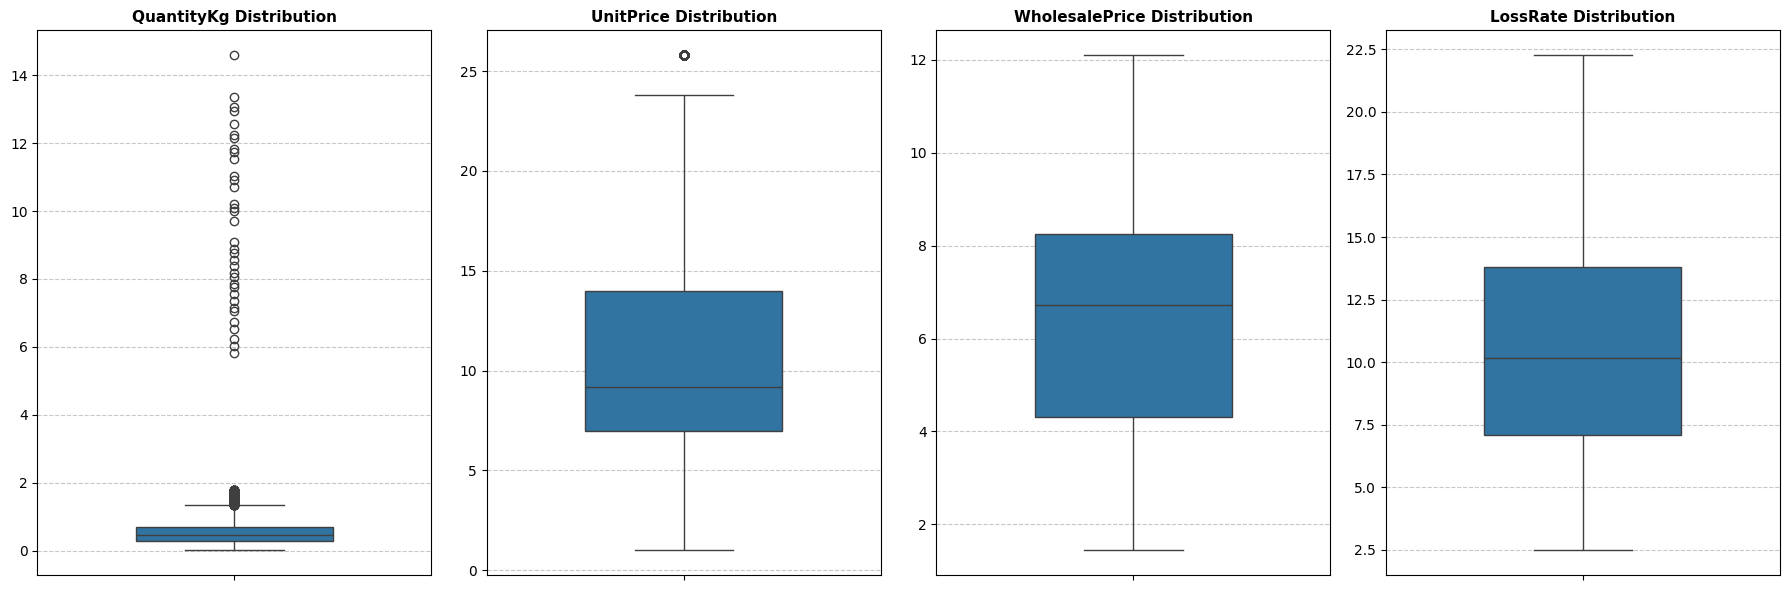

In [58]:
import init_notebooks
from exploratory import Exploratory

ventes_daily_analysis = Exploratory(ventes_daily)



import init_notebooks 
from analysis import Analisis 
import matplotlib.pyplot as plt
import seaborn as sns

# Créer ton analyseur
ventes_seasonal_analysis = Analisis(ventes_seasonal)

variables = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'LossRate']

# IQR
for col in variables : 
    print(ventes_seasonal_analysis.iqr(col).head().to_string())
    print('\n')

# Création des sous-graphes
fig, axes = plt.subplots(1, 4, figsize=(18,6))

# ⚠️ Ici on utilise bien le DataFrame ventes_seasonal
for ax, var in zip(axes, variables):
    sns.boxplot(
        data=ventes_seasonal, y=var, ax=ax
       , width=0.5
    )
    ax.set_title(f"{var} Distribution", fontsize=11, fontweight="bold")
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


On constate que trois variables — WholesalePrice (prix de gros), UnitPrice (prix unitaire) et LossRate (taux de perte) — ne présentent pas de valeurs atypiques et suivent une distribution approximativement normale.

En revanche, la variable QuantityKg (quantité en kg) présente des valeurs aberrantes supérieures à la distribution habituelle.

Il est nécessaire de vérifier si ces valeurs correspondent à des cas exceptionnels ou à de grandes quantités légitimes, afin de déterminer si la distribution peut être considérée comme normale ou non.

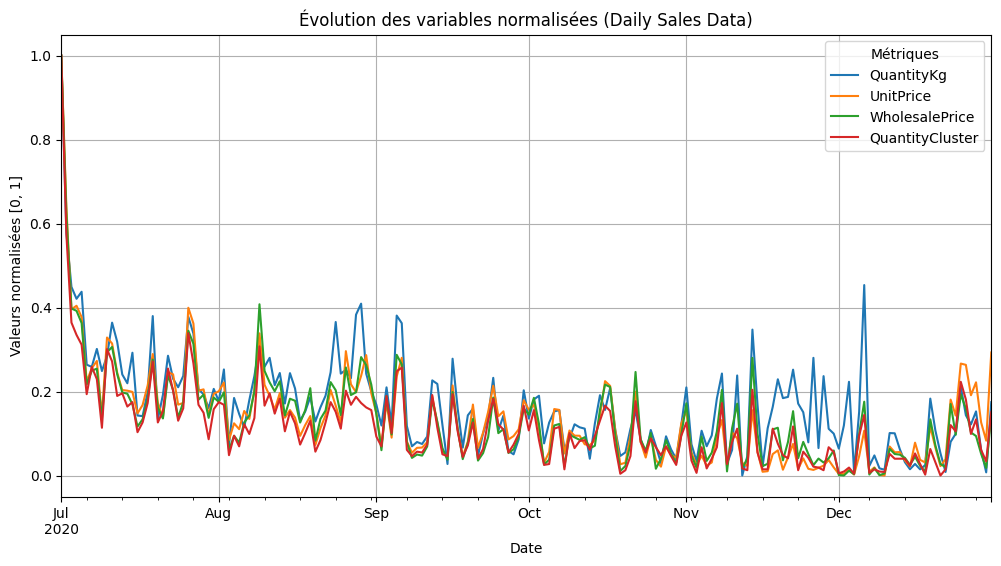

In [ ]:
ventes_numeriques = ventes_daily.select_dtypes(include=['int64', 'float64'])

ventes_daily_normalized = (ventes_numeriques - ventes_numeriques.min()) / (ventes_numeriques.max() - ventes_numeriques.min())

ventes_daily_normalized.drop(columns=["LossRate"]).plot(figsize=(12, 6))


plt.title("Évolution des variables normalisées (Daily Sales Data)")
plt.xlabel("Date")
plt.ylabel("Valeurs normalisées [0, 1]")
plt.legend(title="Métriques")
plt.grid(True)
plt.show()

Aprés normalisation, on constate que les variables prix de gros, quantité (kg) et prix unitaire présentent une variation similaire , c'est à dir qu'elles ont une forte corrélation.

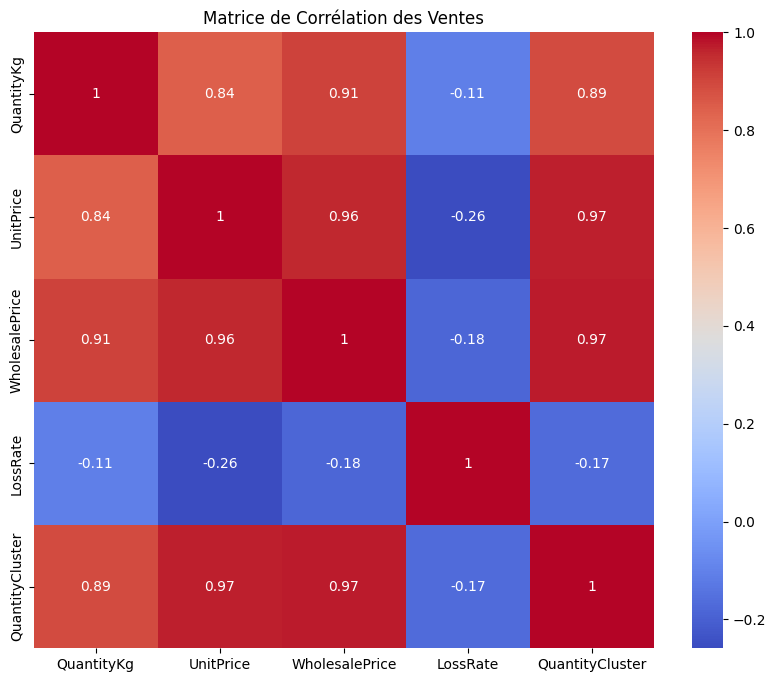

In [ ]:
ventes_daily_corr = ventes_numeriques.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(ventes_daily_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Ventes')
plt.show()

Le résultat montre que les variables WholesalePrice (prix de gros), QuantityKg (quantité en kg) et UnitPrice (prix unitaire) sont fortement corrélées entre elles, avec un coefficient de corrélation atteignant 0,99, soit presque égal à 1.

Cela signifie que ces variables sont fortement liées et apportent une information très similaire.

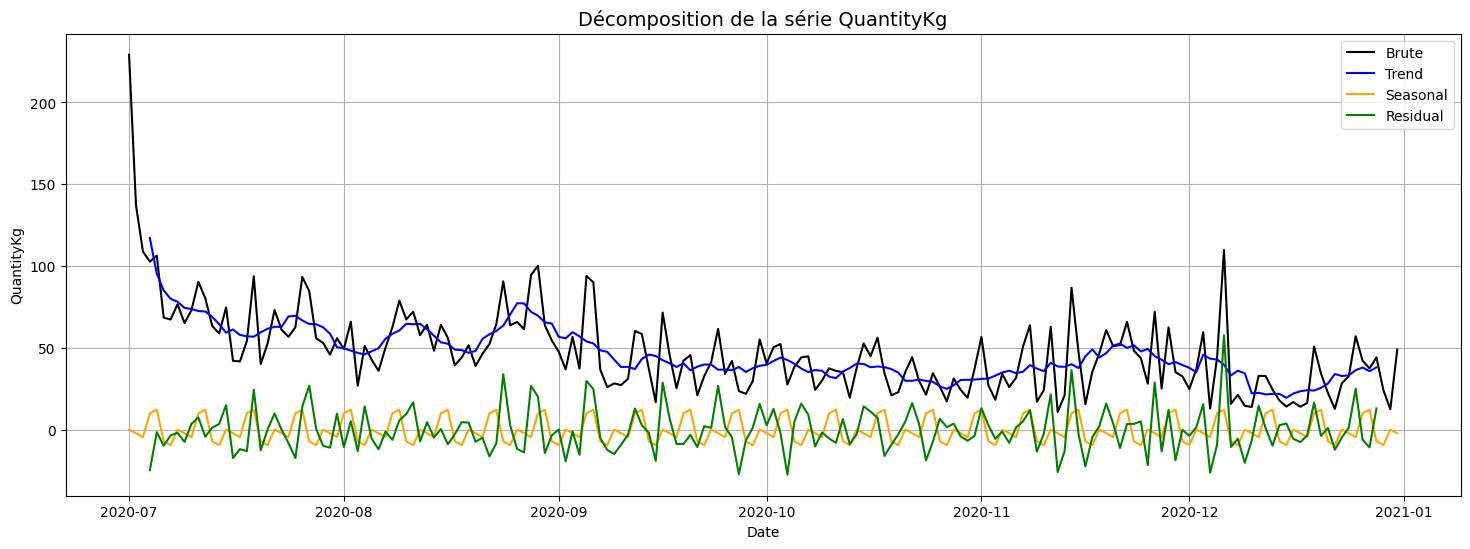

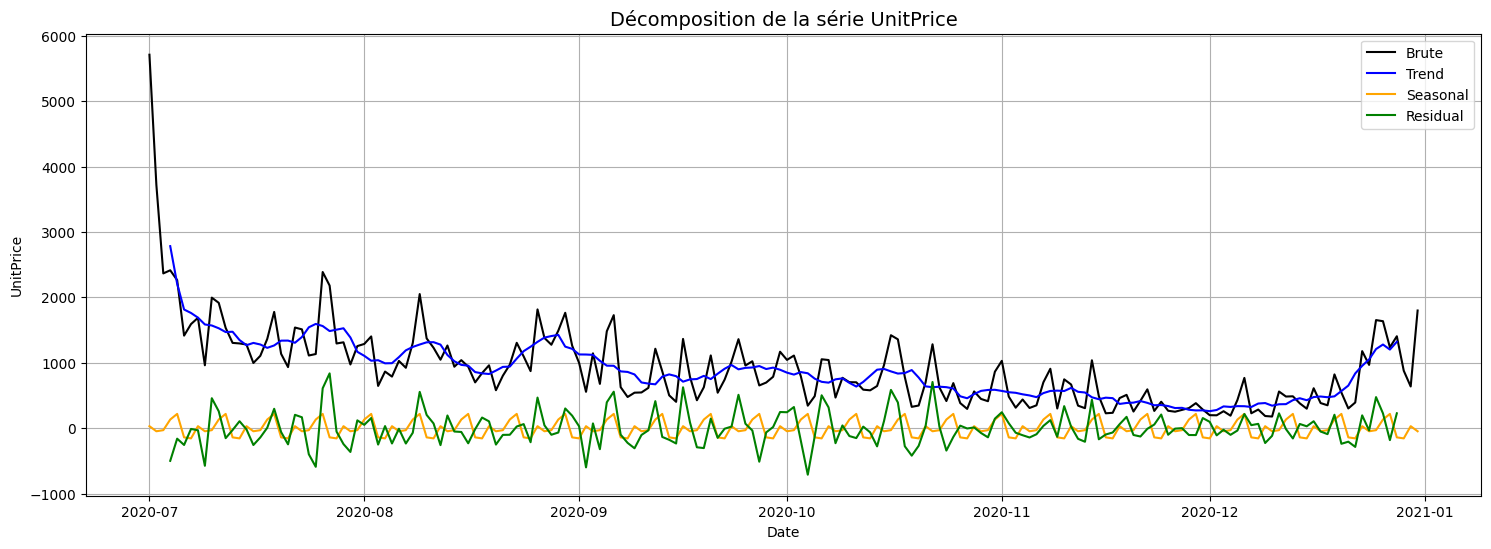

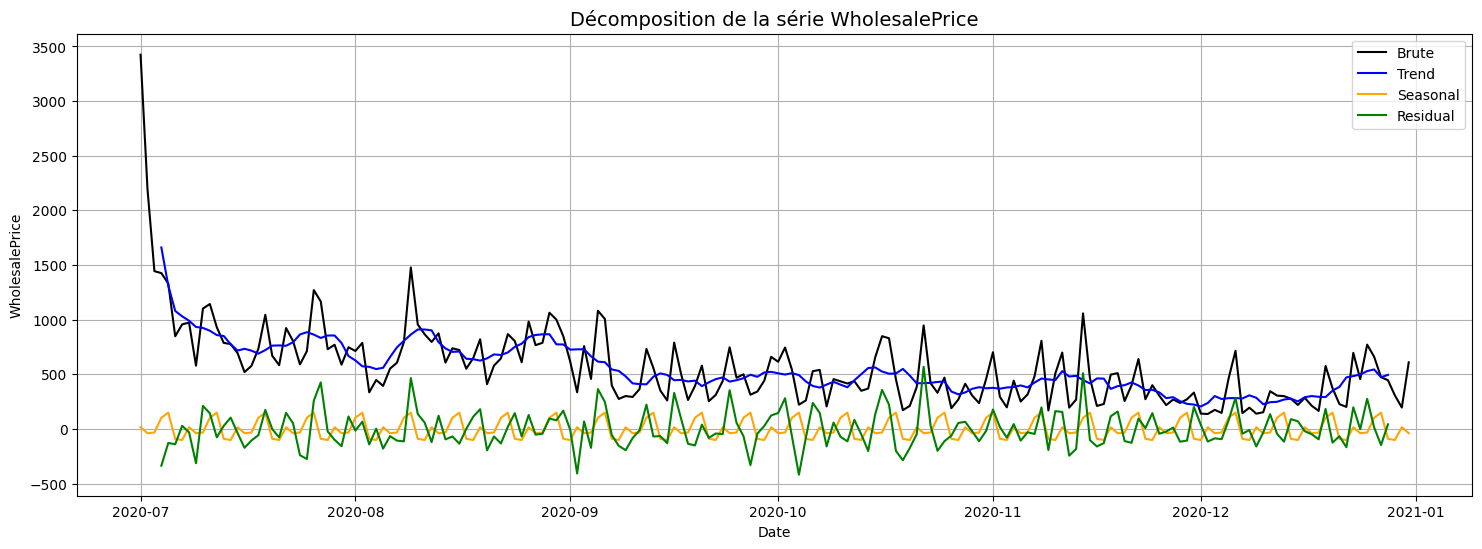

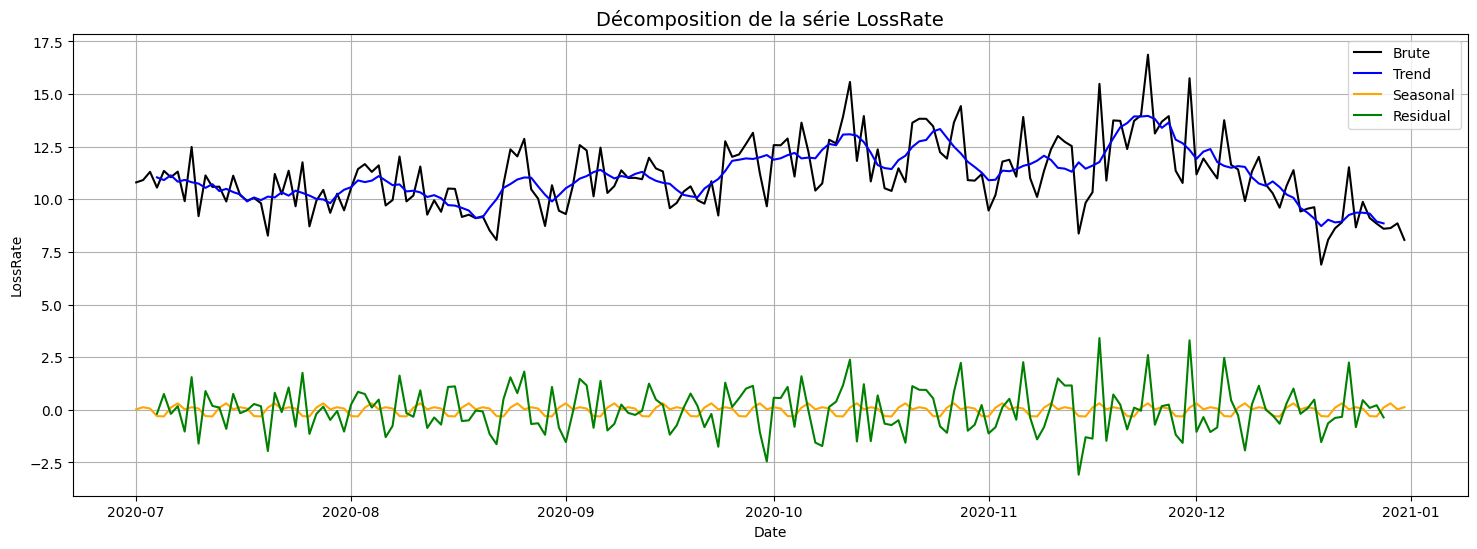

In [61]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Colonnes à analyser
columns = ['QuantityKg', 'UnitPrice', 'WholesalePrice', 'LossRate']

for col in columns:
    # Décomposition
    decomposition = seasonal_decompose(ventes_daily[col], model='additive', period=7)
    
    # Création de la figure
    plt.figure(figsize=(18, 6))
    
    # Tracé de chaque composante
    plt.plot(ventes_daily.index, ventes_daily[col], color='black', label='Brute')
    plt.plot(ventes_daily.index, decomposition.trend, color='blue', label='Trend')
    plt.plot(ventes_daily.index, decomposition.seasonal, color='orange', label='Seasonal')
    plt.plot(ventes_daily.index, decomposition.resid, color='green', label='Residual')
    
    # Titres et légendes
    plt.title(f'Décomposition de la série {col}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    
    plt.show()



On constate que les variables prix de gros, quantité kg et prix unitaire sont élevées pour le mois de juillet, août et pour le septembre , octobre il y a le baissement et de le début novembre elles sont stable.

Mais la plupart du temps (Saisonnalité) son normal pas exception même évaluation pour tout le mois,  en revanche pour la perte (Résiduel), il est toujours stable sauf pour le debut de mois d'octobre. 

Et pour le variable LossRate : il est toujours stable au fill du temps , donc il existe de perte, mais pas beaucoup. 

In [63]:
ventes_daily.head()

,QuantityKg,UnitPrice,WholesalePrice,LossRate,QuantityCluster
SaleDate,,,,,
2020-07-01,229.168,5709.9,3424.11,10.803952,978
2020-07-02,137.249,3720.0,2194.87,10.915888,574
2020-07-03,108.995,2365.8,1443.48,11.304646,374
2020-07-04,102.801,2413.4,1425.49,10.556712,346
2020-07-05,106.455,2263.5,1329.93,11.350288,324


In [64]:
ventes_daily.to_csv('../data/processed/ventes_seasonal.csv', index=True) 